In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload

import os, sys
parentdir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parentdir)

from quanty.model import backtester as q
from quanty.model import backtester_base as q_base
from quanty.model import db_manager as dm
from quanty.model import plotter as pltr
from quanty.model import setting
from quanty.model.portfolio import Port
from quanty.model.dual_momentum import DualMomentumSelector, DualMomentumPort

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

In [4]:
db = dm.read_db(base='global_20201130.pkl', add=[])
start = '2010-12-31'
end = '2020-11-30'

# Global sector model

In [5]:
gsam = q.Backtester(
    setting.base_params(db), 
    w_type='inv_ranky2', 
    rebal_style='cum', 
    n_picks=5, 
    assets=setting.assets_global_sector, 
    sig_w_base=[1,0,0,0,0,0,0,0,0,0,0,0], 
    #sig_w_dynamic=True, 
    #sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_m_backs=12, 
    #sig_dyn_thres=0.0, 
    follow_trend=(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='ACWI', 
    supporter='ACWI', 
    cash_equiv='ACWI', #'BND_US_Tbill', 
    start=start, 
    end=end 
)


14.957436084747314


<Figure size 432x288 with 0 Axes>

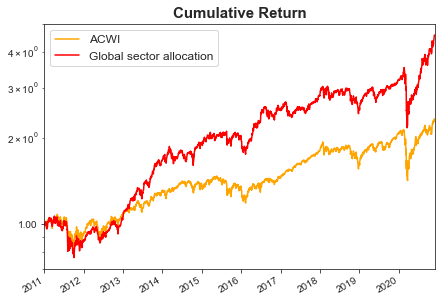

In [6]:
strats = ['ACWI', 'DualMomentum']
names = ['ACWI', 'Global sector allocation']
color = ['orange', 'r']

gsam.plot_cum(strats, names=names, color=color, logy=True);

In [7]:
gsam.get_stats().tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
Telcom_Global,1.94,2496,6.88,16.33,0.42,-27.11,4.75,12.63,0.35,0.83,27.41,60.17,1.04,77.68
Infra,1.72,2496,5.59,17.86,0.31,-42.11,8.27,12.47,0.65,0.91,32.80,60.17,0.98,80.65
BDC,1.80,2496,6.07,22.21,0.27,-55.44,5.87,12.75,0.48,0.84,35.25,60.17,0.98,63.66
ConsumerService,4.48,2496,16.21,17.38,0.93,-33.31,15.56,12.93,1.20,0.90,6.05,65.25,1.28,95.42
DualMomentum,4.58,2496,16.46,20.63,0.80,-38.37,14.52,16.94,0.86,1.00,18.42,65.25,1.10,90.54


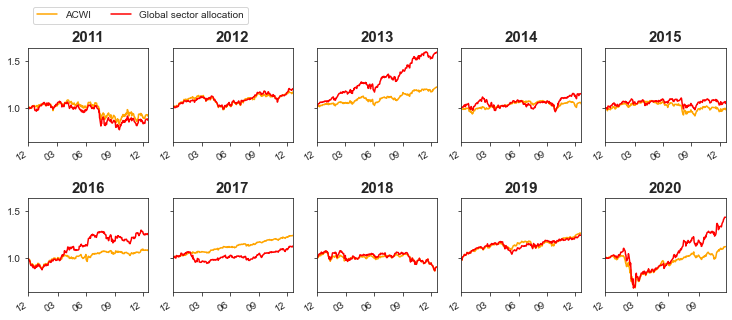

In [8]:
gsam.plot_cum_yearly(strats, names=names, color=color);#, remove=range(2003,2016));

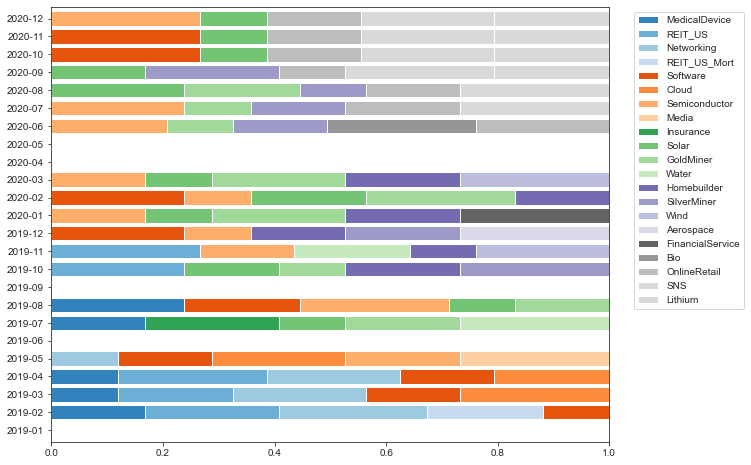

In [9]:
gsam.plot_weight([2019,2020]);

In [10]:
gsam.weight.iloc[-1][gsam.weight.iloc[-1]>0]

Solar            0.119299
Semiconductor    0.266760
Lithium          0.206631
SNS              0.238597
OnlineRetail     0.168714
Name: 2020-11-27 00:00:00, dtype: float64

# US factor model

In [11]:
ufam = q.Backtester(
    setting.base_params(db), 
    w_type='ew', 
    rebal_style='cum', 
    n_picks=1, 
    freq='M',
    assets=setting.assets_test_2, 
    sig_w_base=[1,0,0,0,0,0,0,0,0,0,0,0], 
    #sig_w_dynamic=True, 
    #sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_n_sample= 21*6, 
    #sig_dyn_m_backs=12, 
    #sig_dyn_thres=0.0, 
    #follow_trend=(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='US', 
    supporter='US', #'BND_US_Long', 
    cash_equiv='US', #'BND_US_Tbill', 
    start=start, 
    end=end 
)


5.651842355728149


<Figure size 432x288 with 0 Axes>

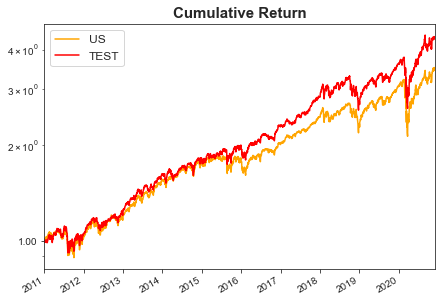

In [12]:
strats = ['US', 'DualMomentum']
names = ['US', 'TEST']
color = ['orange', 'r']

ufam.plot_cum(strats, names=names, color=color, logy=True);

In [13]:
ufam.get_stats()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
Value,2.66,2496,10.31,17.67,0.58,-37.04,10.89,13.25,0.91,0.96,16.87,66.95,0.91,92.26
US,3.51,2496,13.42,17.18,0.78,-33.72,14.82,12.85,1.10,0.95,6.85,71.19,0.90,96.97
ACWI,2.33,2496,8.86,17.56,0.50,-33.53,9.99,13.69,0.66,1.00,22.87,65.25,0.92,90.78
Momentum,4.63,2496,16.59,18.27,0.91,-34.08,16.57,14.12,1.20,0.93,3.38,66.95,1.27,97.99
Quality,3.67,2496,13.93,16.99,0.82,-34.06,13.89,12.56,1.06,0.92,4.49,67.80,1.12,97.31
Growth,4.34,2496,15.86,17.68,0.90,-31.35,16.26,13.71,1.13,0.95,4.45,66.95,1.22,97.76
DualMomentum,4.40,2496,15.99,17.80,0.90,-31.02,15.85,13.79,1.12,0.94,3.47,65.25,1.30,98.06


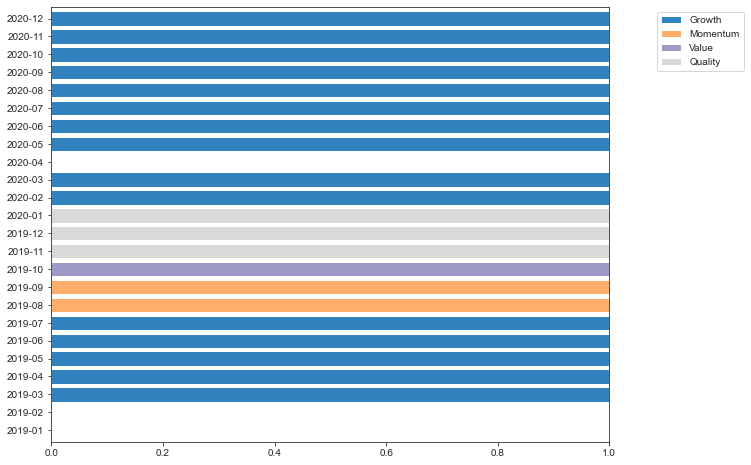

In [14]:
ufam.plot_weight([2019,2020]);

In [15]:
ufam.weight.iloc[-1][ufam.weight.iloc[-1]>0]

Growth    1.0
Name: 2020-11-27 00:00:00, dtype: float64

### Quality 기본 + 낙폭과대

In [16]:
ufam = q.Backtester(
    setting.base_params(db), 
    w_type='ew', 
    rebal_style='cum', 
    n_picks=1, 
    freq='M',
    assets=setting.assets_test_6, 
    sig_w_base=[-1,0,0,0,0,0,-1,0,0,0,-1,1], 
    #sig_w_dynamic=True, 
    #sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_n_sample= 21*6, 
    #sig_dyn_m_backs=12, 
    #sig_dyn_thres=0.0, 
    #follow_trend=(20,60), 
    #follow_trend_market=(20,60), 
    #follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='US', 
    supporter='Quality', #'BND_US_Long', 
    cash_equiv='Quality', #'BND_US_Tbill', 
    start=start, 
    end=end 
)


5.234459161758423


<Figure size 432x288 with 0 Axes>

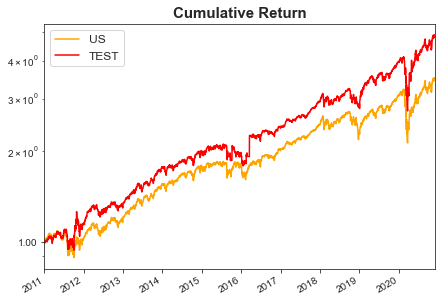

In [17]:
strats = ['US', 'DualMomentum']
names = ['US', 'TEST']
color = ['orange', 'r']

ufam.plot_cum(strats, names=names, color=color, logy=True);

In [18]:
ufam.get_stats()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
Value,2.66,2496,10.31,17.67,0.58,-37.04,10.89,13.25,0.91,0.96,16.87,66.95,0.91,92.26
HighDvd,2.69,2496,10.43,17.08,0.61,-41.59,11.86,11.23,1.04,0.85,13.71,70.34,0.87,88.98
US,3.51,2496,13.42,17.18,0.78,-33.72,14.82,12.85,1.10,0.95,6.85,71.19,0.90,96.97
Momentum,4.63,2496,16.59,18.27,0.91,-34.08,16.57,14.12,1.20,0.93,3.38,66.95,1.27,97.99
Quality,3.67,2496,13.93,16.99,0.82,-34.06,13.89,12.56,1.06,0.92,4.49,67.80,1.12,97.31
Growth,4.34,2496,15.86,17.68,0.90,-31.35,16.26,13.71,1.13,0.95,4.45,66.95,1.22,97.76
LowBeta,2.91,2496,11.28,16.16,0.70,-37.13,11.67,11.03,1.08,0.80,9.52,71.19,0.86,91.29
ACWI,2.33,2496,8.86,17.56,0.50,-33.53,9.99,13.69,0.66,1.00,22.87,65.25,0.92,90.78
Defensive,2.85,2496,11.05,15.03,0.74,-36.53,12.24,10.97,1.16,0.75,12.73,70.34,0.92,95.96
DvdApprec,3.23,2496,12.47,15.99,0.78,-31.72,12.71,11.93,1.08,0.86,6.94,70.34,0.95,97.38


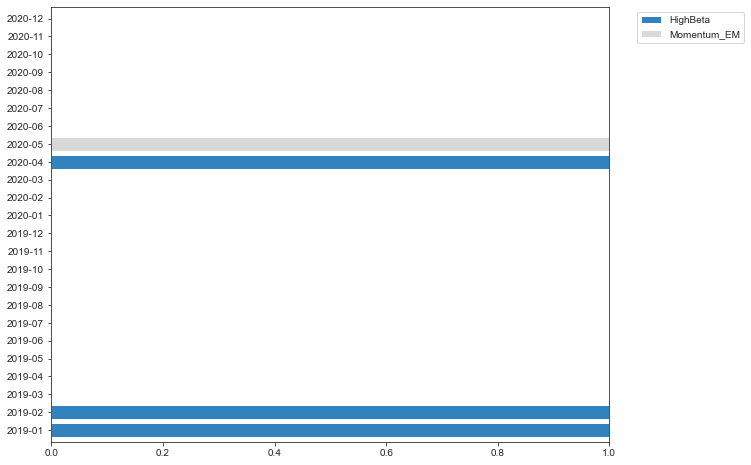

In [19]:
ufam.plot_weight([2019,2020]);

In [20]:
ufam.weight.iloc[-1][ufam.weight.iloc[-1]>0]

Quality    1.0
Name: 2020-11-27 00:00:00, dtype: float64

# US-DM-EM model

In [21]:
udem = q.Backtester(
    setting.base_params(db), 
    w_type='ew', 
    rebal_style='cum', 
    n_picks=1, 
    assets=setting.assets_test_0, 
    sig_w_base=[1,0,0,0,0,0,0,0,0,0,0,0], 
    #sig_w_dynamic=True, 
    #sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_n_sample= 21*6, 
    #sig_dyn_m_backs=12, 
    #sig_dyn_thres=0.0, 
    #follow_trend=(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='ACWI', 
    supporter='ACWI', #'BND_US_Long', 
    cash_equiv='ACWI', #'BND_US_Tbill', 
    start=start, 
    end=end 
)


5.371991872787476


<Figure size 432x288 with 0 Axes>

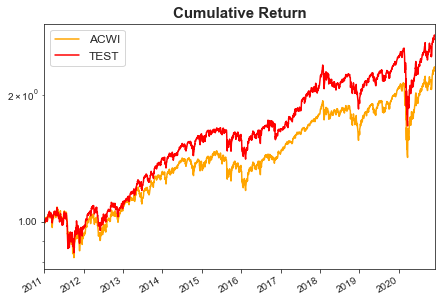

In [22]:
strats = ['ACWI', 'DualMomentum']
names = ['ACWI', 'TEST']
color = ['orange', 'r']

udem.plot_cum(strats, names=names, color=color, logy=True);

In [23]:
udem.get_stats()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
EM,1.28,2496,2.52,22.17,0.11,-38.20,1.78,19.05,0.10,1.13,44.90,50.00,1.21,-18.91
Global,1.59,2496,4.78,18.63,0.26,-34.98,4.46,14.15,0.25,1.03,37.56,58.47,0.97,65.44
ACWI,2.33,2496,8.86,17.56,0.50,-33.53,9.99,13.69,0.66,1.00,22.87,65.25,0.92,90.78
US_Total,3.50,2496,13.37,17.56,0.76,-35.00,14.60,13.17,1.09,0.97,9.39,71.19,0.88,96.35
DualMomentum,2.78,2496,10.77,18.21,0.59,-34.69,11.42,15.01,0.73,1.00,18.02,66.95,0.93,93.93


In [24]:
udem.weight.tail()

,EM,Global,ACWI,US_Total
2020-07-31,0.0,0.0,0.0,1.0
2020-08-31,0.0,0.0,0.0,1.0
2020-09-30,0.0,0.0,0.0,1.0
2020-10-30,0.0,0.0,0.0,1.0
2020-11-27,0.0,0.0,0.0,1.0


# Global country 낙폭과대

In [25]:
usm = q.Backtester(
    setting.base_params(db),
    w_type='ew', 
    rebal_style='cum', 
    n_picks=1, 
    assets=setting.assets_global_eq2, 
    sig_w_base=[-1,0,0,0,0,0,-1,0,0,0,0,1], 
    #sig_w_dynamic=True, 
    #sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_n_sample= 21*6, 
    #sig_dyn_m_backs=12, 
    #sig_dyn_thres=0.0, 
    #follow_trend=(20,60), 
    #follow_trend_market=(20,60), 
    #follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='ACWI', 
    supporter='ACWI', #'BND_US_Long', 
    cash_equiv='ACWI', #'BND_US_Tbill', 
    start=start, 
    end=end
)


6.534614086151123


<Figure size 432x288 with 0 Axes>

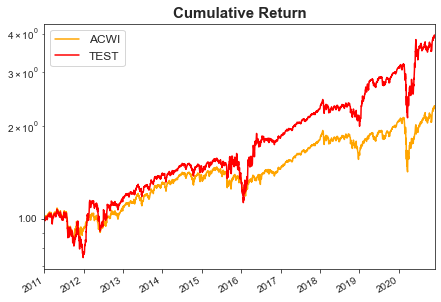

In [26]:
strats = ['ACWI', 'DualMomentum']
names = ['ACWI', 'TEST']
color = ['orange', 'r']

usm.plot_cum(strats, names=names, color=color, logy=True);

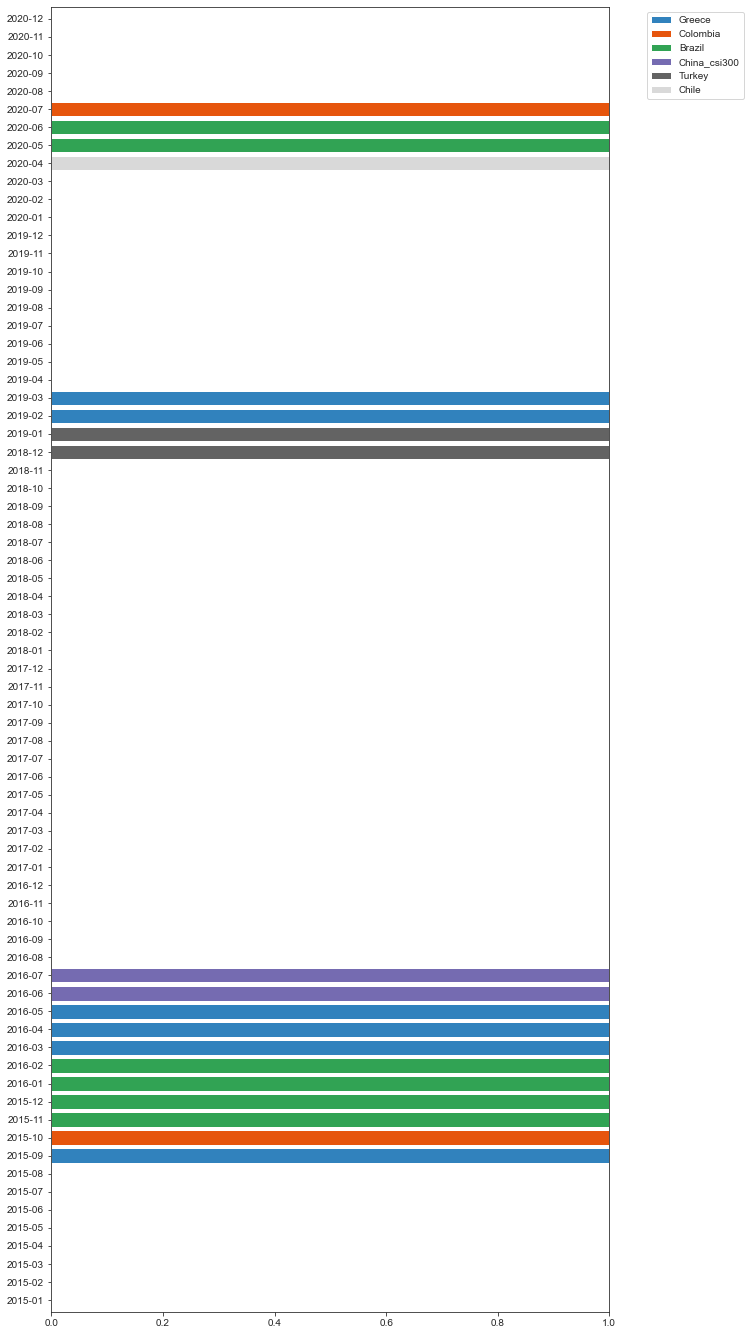

In [27]:
usm.plot_weight([2015,2020]);

In [28]:
usm.get_stats()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
UK,1.22,2496,2.04,20.26,0.10,-43.33,0.39,14.32,0.02,1.05,49.09,59.32,0.82,13.68
Spain,1.12,2496,1.11,26.94,0.04,-50.93,-5.21,22.75,-0.24,1.24,57.50,51.69,1.08,3.69
China,1.97,2496,7.04,23.96,0.29,-43.24,6.31,21.57,0.30,1.00,36.49,56.78,1.07,51.68
China_csi300,1.81,2496,6.13,28.27,0.22,-50.24,3.78,22.90,0.16,0.66,43.04,53.39,1.16,35.14
Philip,1.35,2496,3.05,24.01,0.13,-53.82,3.10,19.97,0.15,0.91,44.64,55.08,1.01,-28.79
Peru,0.83,2496,-1.91,22.19,-0.09,-60.62,-3.12,17.11,-0.15,0.78,55.94,51.69,0.98,-46.63
HongKong,1.74,2496,5.70,19.09,0.30,-31.08,7.27,16.55,0.43,0.82,32.04,58.47,0.98,79.30
Malaysia,0.94,2496,-0.57,18.76,-0.03,-50.30,-0.04,16.47,-0.00,0.77,50.07,50.00,1.05,11.35
Egypt,0.40,2496,-8.69,28.13,-0.31,-74.86,-9.84,28.13,-0.39,0.57,64.13,44.92,1.11,41.11
France,1.73,2496,5.66,23.57,0.24,-39.23,2.58,18.60,0.12,1.21,44.95,55.08,1.11,65.12
